In [110]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Set tables reading options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)

year = 2017

# Files
players_names = "_Data/Predictions/stats_players_{}_weight06.csv".format(year)
predicted_probas = "_Data/Predictions/players_rounds_predictions_{}.csv".format(year)

# Read the csv files
players_df = pd.read_csv(players_names, header=0, index_col=0)
df = pd.read_csv(predicted_probas, names = ["Winner%", "Final%", "SF%", "QF%", 'R16%', 'R32%', 'R64%'])
df.index = range(1, len(df)+1)

# Concat names and probas
players_df = players_df.iloc[:,[0,4]]
new_df = pd.concat([players_df, df], axis=1)
new_df

,Name,rank,Winner%,Final%,SF%,QF%,R16%,R32%,R64%
1,Andy Murray,1.0,0.067379,0.118910,0.194251,0.296663,0.435282,0.587205,0.766540
2,Novak Djokovic,2.0,0.104652,0.163438,0.254648,0.369614,0.513885,0.656350,0.809839
3,Stanislas Wawrinka,3.0,0.029858,0.059324,0.106348,0.190673,0.321811,0.488016,0.700400
4,Rafael Nadal,4.0,0.080161,0.127066,0.198541,0.309021,0.454403,0.606186,0.778748
5,Milos Raonic,6.0,0.053242,0.090504,0.151688,0.236239,0.376877,0.537200,0.733239
6,Dominic Thiem,7.0,0.022316,0.042956,0.084556,0.148628,0.270796,0.435523,0.660760
7,Marin Cilic,8.0,0.022127,0.042871,0.076996,0.144753,0.266736,0.430676,0.657523
8,Kei Nishikori,9.0,0.035689,0.062578,0.106803,0.184215,0.319980,0.483718,0.696124
9,Alexander Zverev,17.0,0.018788,0.036858,0.071159,0.134599,0.225922,0.409276,0.641038
10,David Goffin,10.0,0.012743,0.026457,0.053805,0.110688,0.193725,0.367841,0.608394


In [111]:
# Sort by highest probabilities for Winner
winner_df = new_df.sort_values(by=['Winner%'], ascending=False)
winner_df = winner_df.iloc[:,[0,1,2]]
winner_df

,Name,rank,Winner%
2,Novak Djokovic,2.0,0.104652
4,Rafael Nadal,4.0,0.080161
1,Andy Murray,1.0,0.067379
5,Milos Raonic,6.0,0.053242
18,Nick Kyrgios,19.0,0.038120
8,Kei Nishikori,9.0,0.035689
12,Jo Wilfried Tsonga,13.0,0.033452
3,Stanislas Wawrinka,3.0,0.029858
14,Jack Sock,14.0,0.023752
13,Tomas Berdych,14.0,0.023234


In [112]:
# Sort by highest probabilities for Final
final_df = new_df.sort_values(by=['Final%'], ascending=False)
final_df = final_df.iloc[:,[0,1,3]]
final_df

,Name,rank,Final%
2,Novak Djokovic,2.0,0.163438
4,Rafael Nadal,4.0,0.127066
1,Andy Murray,1.0,0.118910
5,Milos Raonic,6.0,0.090504
18,Nick Kyrgios,19.0,0.064067
8,Kei Nishikori,9.0,0.062578
3,Stanislas Wawrinka,3.0,0.059324
12,Jo Wilfried Tsonga,13.0,0.058191
13,Tomas Berdych,14.0,0.043105
14,Jack Sock,14.0,0.043095


In [113]:
# Sort by highest probabilities for SF
SF_df = new_df.sort_values(by=['SF%'], ascending=False)
SF_df = SF_df.iloc[:,[0,1,4]]
SF_df

,Name,rank,SF%
2,Novak Djokovic,2.0,0.254648
4,Rafael Nadal,4.0,0.198541
1,Andy Murray,1.0,0.194251
5,Milos Raonic,6.0,0.151688
8,Kei Nishikori,9.0,0.106803
18,Nick Kyrgios,19.0,0.106405
3,Stanislas Wawrinka,3.0,0.106348
12,Jo Wilfried Tsonga,13.0,0.099155
6,Dominic Thiem,7.0,0.084556
13,Tomas Berdych,14.0,0.078107


In [114]:
# Sort by highest probabilities for QF
QF_df = new_df.sort_values(by=['QF%'], ascending=False)
QF_df = QF_df.iloc[:,[0,1,5]]
QF_df

,Name,rank,QF%
2,Novak Djokovic,2.0,0.369614
4,Rafael Nadal,4.0,0.309021
1,Andy Murray,1.0,0.296663
5,Milos Raonic,6.0,0.236239
3,Stanislas Wawrinka,3.0,0.190673
8,Kei Nishikori,9.0,0.184215
12,Jo Wilfried Tsonga,13.0,0.175536
18,Nick Kyrgios,19.0,0.174948
6,Dominic Thiem,7.0,0.148628
7,Marin Cilic,8.0,0.144753


In [115]:
# Sort by highest probabilities for R16
R16_df = new_df.sort_values(by=['R16%'], ascending=False)
R16_df = R16_df.iloc[:,[0,1,6]]
R16_df

,Name,rank,R16%
2,Novak Djokovic,2.0,0.513885
4,Rafael Nadal,4.0,0.454403
1,Andy Murray,1.0,0.435282
5,Milos Raonic,6.0,0.376877
3,Stanislas Wawrinka,3.0,0.321811
8,Kei Nishikori,9.0,0.319980
18,Nick Kyrgios,19.0,0.290415
12,Jo Wilfried Tsonga,13.0,0.274691
6,Dominic Thiem,7.0,0.270796
7,Marin Cilic,8.0,0.266736


In [116]:
# Sort by highest probabilities for R32
R32_df = new_df.sort_values(by=['R32%'], ascending=False)
R32_df = R32_df.iloc[:,[0,1,7]]
R32_df

,Name,rank,R32%
2,Novak Djokovic,2.0,0.656350
4,Rafael Nadal,4.0,0.606186
1,Andy Murray,1.0,0.587205
5,Milos Raonic,6.0,0.537200
3,Stanislas Wawrinka,3.0,0.488016
8,Kei Nishikori,9.0,0.483718
12,Jo Wilfried Tsonga,13.0,0.463905
6,Dominic Thiem,7.0,0.435523
18,Nick Kyrgios,19.0,0.432669
7,Marin Cilic,8.0,0.430676


In [117]:
# Sort by highest probabilities for R64
R64_df = new_df.sort_values(by=['R64%'], ascending=False)
R64_df = R64_df.iloc[:,[0,1,8]]
R64_df

,Name,rank,R64%
2,Novak Djokovic,2.0,0.809839
4,Rafael Nadal,4.0,0.778748
1,Andy Murray,1.0,0.766540
5,Milos Raonic,6.0,0.733239
3,Stanislas Wawrinka,3.0,0.700400
8,Kei Nishikori,9.0,0.696124
12,Jo Wilfried Tsonga,13.0,0.681895
6,Dominic Thiem,7.0,0.660760
18,Nick Kyrgios,19.0,0.659111
7,Marin Cilic,8.0,0.657523


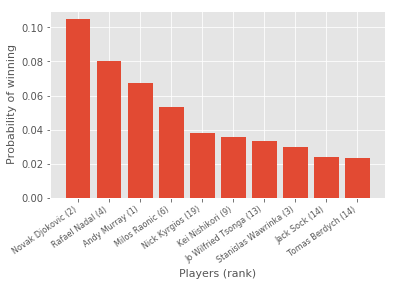

In [118]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR WINNER
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = winner_df.iloc[:nb_players, 0].tolist()
ranks = winner_df.iloc[:nb_players, 1].tolist()
probas = winner_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability of winning', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_winner".format(year))

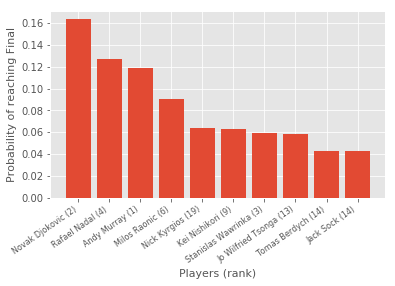

In [119]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR FINAL
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = final_df.iloc[:nb_players, 0].tolist()
ranks = final_df.iloc[:nb_players, 1].tolist()
probas = final_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability of reaching Final', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_final".format(year))

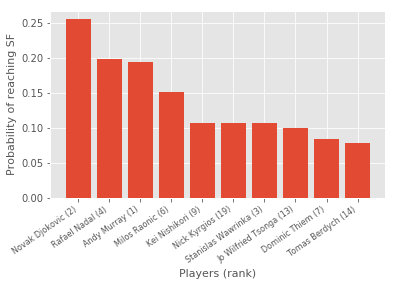

In [120]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR SF
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = SF_df.iloc[:nb_players, 0].tolist()
ranks = SF_df.iloc[:nb_players, 1].tolist()
probas = SF_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability of reaching SF', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_SF".format(year))

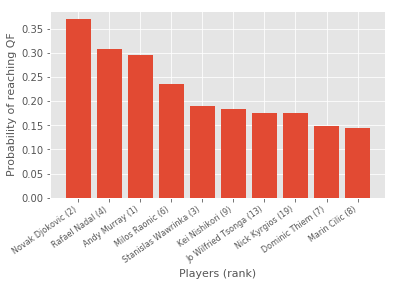

In [121]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR QF
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = QF_df.iloc[:nb_players, 0].tolist()
ranks = QF_df.iloc[:nb_players, 1].tolist()
probas = QF_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability of reaching QF', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_QF".format(year))

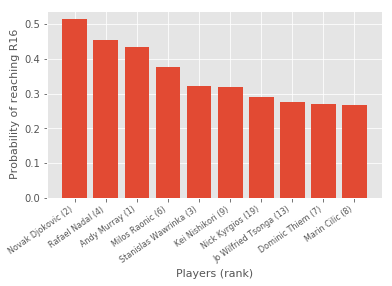

In [122]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR R16
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = R16_df.iloc[:nb_players, 0].tolist()
ranks = R16_df.iloc[:nb_players, 1].tolist()
probas = R16_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability of reaching R16', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_R16".format(year))

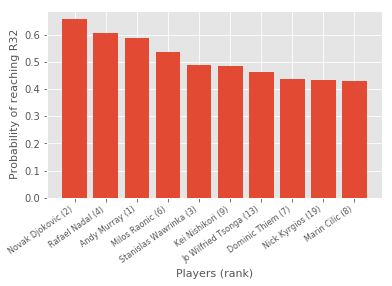

In [123]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR R32
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = R32_df.iloc[:nb_players, 0].tolist()
ranks = R32_df.iloc[:nb_players, 1].tolist()
probas = R32_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability of reaching R32', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_R32".format(year))

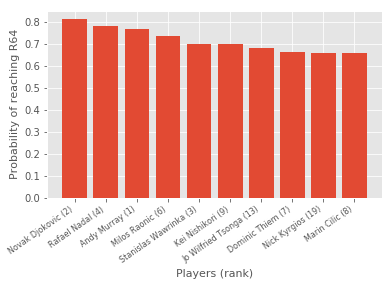

In [124]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR R64
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = R64_df.iloc[:nb_players, 0].tolist()
ranks = R64_df.iloc[:nb_players, 1].tolist()
probas = R64_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure()
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability of reaching R64', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_R64".format(year))